<a href="https://colab.research.google.com/github/shab29/Regression_capstoneProject/blob/main/Sales_prediction_SB2_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
store_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/Copy of store.csv')
sale_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/Copy of Rossmann Stores Data.csv')

In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


# Merge the Data using Store

In [6]:
DF=sale_data.merge(right=store_data,on="Store",how="left")

In [13]:
#check for duplicate data
print(DF.duplicated().sum())

0


In [7]:
DF.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

* Convert the Date into Date time format.

In [14]:
from datetime import datetime
DF["Date"] = DF["Date"].astype(np.datetime64)

In [8]:
DF.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

* There are null values in Competion Distance, Competition Opend Since Month, Competition Open Since Year, Promo2SinceWeek, Promo2SinceYear, PromoInterval.
* Promo2SinceWeek and year has equal number of null values. It is because when there is no promo2 that means there will be no value in Promo2SinceWeek and Promo2SinceYear.


# Filling the null values

Text(0, 0.5, 'PDF')

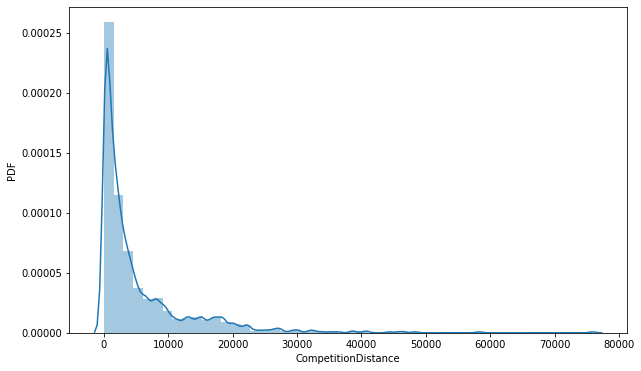

In [15]:
#checking the distribution of CompetitionDistance
plt.subplots(figsize=(10, 6))
sns.distplot(x = DF["CompetitionDistance"])
plt.xlabel("CompetitionDistance")
plt.ylabel("PDF")


In [16]:
#Checking the median of Competition Distance according to each store type
DF.groupby(['StoreType'])['CompetitionDistance'].median()

StoreType
a    1790.0
b     900.0
c    1650.0
d    5070.0
Name: CompetitionDistance, dtype: float64

* We will fill up the NaN in Competition distance according to median of each store type.

In [17]:
#Finding the median distance for each store type
median_a=round(DF.loc[(DF['StoreType'] == 'a'), 'CompetitionDistance'].median(), 1)
median_b=round(DF.loc[(DF['StoreType'] == 'b'), 'CompetitionDistance'].median(), 1)
median_c=round(DF.loc[(DF['StoreType'] == 'c'), 'CompetitionDistance'].median(), 1)
median_d=round(DF.loc[(DF['StoreType'] == 'd'), 'CompetitionDistance'].median(), 1)

In [18]:
#filling the null values of CompetitionDistance according to store type
DF.loc[DF['StoreType']=='a']=DF.loc[DF['StoreType']=='a'].fillna(value={'CompetitionDistance':median_a})
DF.loc[DF['StoreType']=='b']=DF.loc[DF['StoreType']=='b'].fillna(value={'CompetitionDistance':median_b})
DF.loc[DF['StoreType']=='c']=DF.loc[DF['StoreType']=='c'].fillna(value={'CompetitionDistance':median_c})
DF.loc[DF['StoreType']=='d']=DF.loc[DF['StoreType']=='d'].fillna(value={'CompetitionDistance':median_d})

In [19]:
DF.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

* Now we have 0 null values in Competition Distance.

Text(0, 0.5, 'PDF')

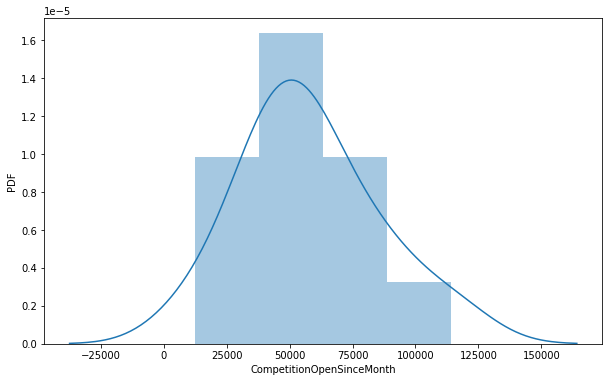

In [21]:
#Check the distribution of CompetitionOpenSinceMonth
plt.subplots(figsize=(10, 6))
sns.distplot(x = DF["CompetitionOpenSinceMonth"].value_counts())
plt.xlabel("CompetitionOpenSinceMonth")
plt.ylabel("PDF")

* The distribution is symmetric, so mean and median will be approximately symmetrical. We can use any of them to fill NaN.

In [24]:
#Let's check mean value for CompetitionOpenSinceMonth according to each store type
DF.groupby(['StoreType'])['CompetitionOpenSinceMonth'].mean()

StoreType
a    7.176508
b    6.666667
c    7.048265
d    7.426956
Name: CompetitionOpenSinceMonth, dtype: float64

In [25]:
DF.groupby(['StoreType'])['CompetitionOpenSinceMonth'].median()

StoreType
a    8.0
b    6.0
c    7.0
d    8.0
Name: CompetitionOpenSinceMonth, dtype: float64

* we will use the median since it is a whole number.

In [26]:
#Finding the median month for each store type
medianMonth_a=round(DF.loc[(DF['StoreType'] == 'a'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_b=round(DF.loc[(DF['StoreType'] == 'b'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_c=round(DF.loc[(DF['StoreType'] == 'c'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_d=round(DF.loc[(DF['StoreType'] == 'd'), 'CompetitionOpenSinceMonth'].median(), 1)

In [27]:
#filling the null values of CompetitionOpenSinceMonth according to store type
DF.loc[DF['StoreType']=='a']=DF.loc[DF['StoreType']=='a'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_a})
DF.loc[DF['StoreType']=='b']=DF.loc[DF['StoreType']=='b'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_b})
DF.loc[DF['StoreType']=='c']=DF.loc[DF['StoreType']=='c'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_c})
DF.loc[DF['StoreType']=='d']=DF.loc[DF['StoreType']=='d'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_d})

In [28]:
DF.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

* There are 0 null values in CompetitionOpenSinceMonth now.
* We can use same approach for CompetitionOpenSinceYear.

In [29]:
DF.groupby(['StoreType'])['CompetitionOpenSinceYear'].median()

StoreType
a    2010.0
b    2008.0
c    2009.0
d    2010.0
Name: CompetitionOpenSinceYear, dtype: float64

In [32]:
#Finding the median Year for each store type
medianYear_a=round(DF.loc[(DF['StoreType'] == 'a'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_b=round(DF.loc[(DF['StoreType'] == 'b'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_c=round(DF.loc[(DF['StoreType'] == 'c'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_d=round(DF.loc[(DF['StoreType'] == 'd'), 'CompetitionOpenSinceYear'].median(), 1)

#filling the null values of CompetitionOpenSinceYear according to store type
DF.loc[DF['StoreType']=='a']=DF.loc[DF['StoreType']=='a'].fillna(value={'CompetitionOpenSinceYear':medianYear_a})
DF.loc[DF['StoreType']=='b']=DF.loc[DF['StoreType']=='b'].fillna(value={'CompetitionOpenSinceYear':medianYear_b})
DF.loc[DF['StoreType']=='c']=DF.loc[DF['StoreType']=='c'].fillna(value={'CompetitionOpenSinceYear':medianYear_c})
DF.loc[DF['StoreType']=='d']=DF.loc[DF['StoreType']=='d'].fillna(value={'CompetitionOpenSinceYear':medianYear_d})

In [33]:
DF.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

* Now we need to fill null values for Promo2SinceWeek, Promo2SinceYear and PromoInterval.
* If there is no Promo2 then its corresponding value of week, Year and Interval will be missing.
* We can replace the null value of week and Year with the week and Year with the Date given in the dataset.

In [36]:
DF['Promo2SinceWeek'].fillna(DF["Date"].dt.weekofyear,inplace=True)

In [40]:
DF['Promo2SinceYear'].fillna(DF["Date"].dt.year,inplace=True)

In [42]:
#Check the unique values of PromoInterval
DF['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

* We can replace the null value with "NA" because of the promo2 is not applied then the promo interval is also not aplicable here.

In [43]:
DF['PromoInterval'].fillna("NA",inplace=True)

In [45]:
DF.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64